In [1]:
library(faraway)
data(dicentric)

In [2]:
model <- glm(ca ~ offset(log(cells)) + doserate*doseamt,
            family=poisson, data=dicentric)
summary(model)


Call:
glm(formula = ca ~ offset(log(cells)) + doserate * doseamt, family = poisson, 
    data = dicentric)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7308  -2.2842  -0.6264   3.3487   5.8272  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.29994    0.06160 -53.567  < 2e-16 ***
doserate          0.06401    0.02922   2.191 0.028476 *  
doseamt           0.61224    0.01707  35.862  < 2e-16 ***
doserate:doseamt  0.02715    0.00765   3.549 0.000387 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4753.00  on 26  degrees of freedom
Residual deviance:  270.26  on 23  degrees of freedom
AIC: 453.67

Number of Fisher Scoring iterations: 4


In [3]:
(phi <- sum(residuals(model, type="pearson")^2)/23) # Lot higher than 1 -> OD

[1] 12.97226

In [4]:
model.f <- glm(ca ~ offset(log(cells)) + doserate*doseamt,
            family=quasipoisson, data=dicentric)
summary(model.f)


Call:
glm(formula = ca ~ offset(log(cells)) + doserate * doseamt, family = quasipoisson, 
    data = dicentric)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7308  -2.2842  -0.6264   3.3487   5.8272  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.29994    0.22188 -14.873 2.73e-13 ***
doserate          0.06401    0.10524   0.608    0.549    
doseamt           0.61224    0.06149   9.957 8.29e-10 ***
doserate:doseamt  0.02715    0.02755   0.985    0.335    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 12.97228)

    Null deviance: 4753.00  on 26  degrees of freedom
Residual deviance:  270.26  on 23  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


In [5]:
model.r <- glm(ca ~ offset(log(cells)) + doserate + doseamt,
            family=quasipoisson, data=dicentric)
anova(model.f, model.r, test = "F")

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23,270.2594,NA,NA,NA,NA
2,24,282.9471,-1,-12.68767,0.9780603,0.3329689


Interaction term is not siginificant

In [6]:
set.seed(30027)

In [7]:
lambda.1 <- 2
lambda.2 <- 10
pi.1 <- 0.3
pi.2 <- 1-pi.1
NUM.SAMPLES <- 1000

In [8]:
X <- rep(NA, NUM.SAMPLES)
Z <- rep(NA, NUM.SAMPLES)

In [9]:
for (i in 1:NUM.SAMPLES) {
    Z[i] <- rbinom(n=1, size=1, prob=pi.2)
    if (Z[i] == 0) {
        X[i] <- rpois(1, lambda = lambda.1)
    }
    else {
        X[i] <- rpois(1, lambda = lambda.2)
    }
}

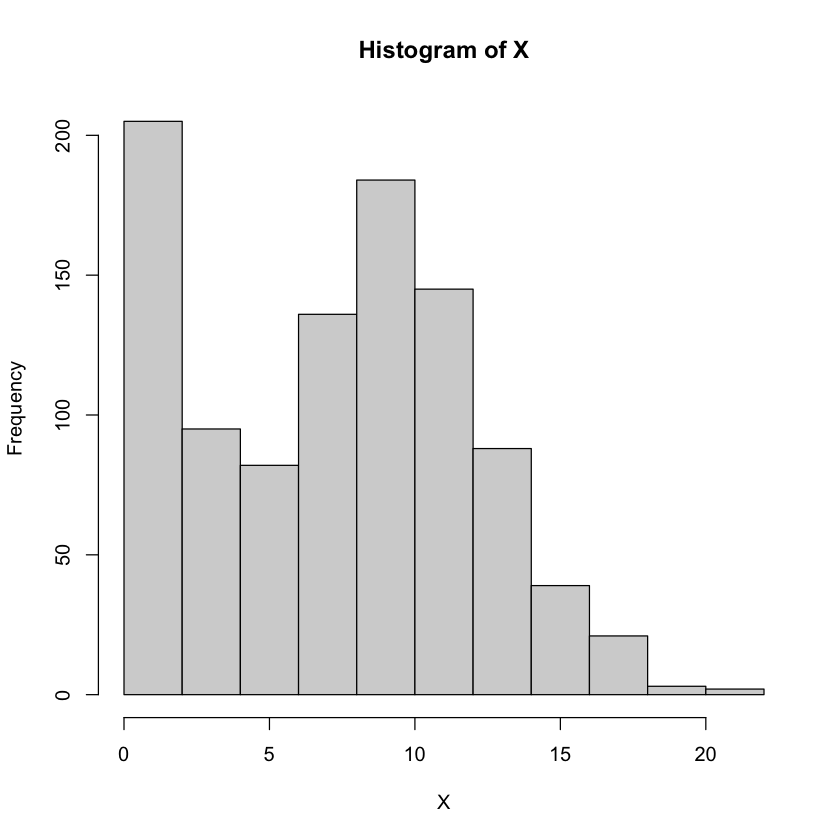

In [10]:
hist(X)

In [11]:
# (2)
L <- matrix(NA, nrow=length(X), ncol=2)
L[, 1] <- dpois(X, lambda=lambda.1)
L[, 2] <- dpois(X, lambda=lambda.2)
L[, 1] <- L[, 1] * pi.1
L[, 2] <- L[, 2] * pi.2

In [12]:
CP = L/rowSums(L)

In [13]:
# Incorrectly assigned to the cluster 2 when it's 1
sum((Z==0) & (CP[,2]>0.5))

[1] 19

In [14]:
# Incorrectly assigned to the cluster 1 when it's 2
sum((Z==1) & (CP[,2]<=0.5))

[1] 21